# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
found_cities = []
city_name = []
city_cloudiness = []
city_country = []
city_date = []
city_humidity = []
city_Lat = []
city_Lng = []
city_Max_Temp = []
city_wind_speed = []

city_index = 0
set_index = 1

params = {"units" : "Imperial"}

print("Beginning Data Retrieval\n-----------------------------")

for city in cities:
    query_url = url + "appid=" + api_key + "&q=" + city
    
    try:
        weather_data = requests.get(query_url, params = params).json()
        
        city_name.append(weather_data['name'])
        city_cloudiness.append(weather_data['clouds']['all'])
        city_country.append(weather_data['sys']['country'])
        city_date.append(weather_data['dt'])
        city_humidity.append(weather_data['main']['humidity'])
        city_Lat.append(weather_data['coord']['lat'])
        city_Lng.append(weather_data['coord']['lon'])
        city_Max_Temp.append(weather_data['main']['temp_max'])
        city_wind_speed.append(weather_data['wind']['speed'])
        
        city_index += 1
        
        if city_index == 50:
            set_index += 1
            city_index = 0
            print(f"Processing Record {city_index} of Set {set_index} | {city}")
            
        else:
            print(f"Processing Record {city_index} of Set {set_index} | {city}")
    
    except KeyError:
        print("City not found. Skipping...")
        
print("-----------------------------\nData Retrieval Complete\n-----------------------------")
        
found_cities = zip(city_name, city_cloudiness, city_country, city_date, city_humidity, city_Lat, city_Lng, city_Max_Temp, city_wind_speed)

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | barrow
City not found. Skipping...
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | bayan
Processing Record 4 of Set 1 | aklavik
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | rikitea
City not found. Skipping...
Processing Record 7 of Set 1 | oropesa
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | ponta do sol
City not found. Skipping...
Processing Record 10 of Set 1 | longyearbyen
Processing Record 11 of Set 1 | fort-shevchenko
Processing Record 12 of Set 1 | huarmey
Processing Record 13 of Set 1 | coihaique
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | new norfolk
Processing Record 16 of Set 1 | oxford
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | castro
Processing Record 19 of Set 1 | bluff
City not found. Skipping...
Processing Record 20 of Set 1 | chokurdakh
City not fo

Processing Record 35 of Set 4 | yaan
Processing Record 36 of Set 4 | kensington
Processing Record 37 of Set 4 | pendleton
Processing Record 38 of Set 4 | bambanglipuro
City not found. Skipping...
Processing Record 39 of Set 4 | puerto montt
Processing Record 40 of Set 4 | constitucion
Processing Record 41 of Set 4 | clyde river
Processing Record 42 of Set 4 | nalut
Processing Record 43 of Set 4 | villa corzo
Processing Record 44 of Set 4 | inuvik
Processing Record 45 of Set 4 | severo-kurilsk
Processing Record 46 of Set 4 | tulun
Processing Record 47 of Set 4 | san rafael
Processing Record 48 of Set 4 | port hedland
Processing Record 49 of Set 4 | tarko-sale
Processing Record 0 of Set 5 | lagoa
Processing Record 1 of Set 5 | keti bandar
Processing Record 2 of Set 5 | novikovo
City not found. Skipping...
Processing Record 3 of Set 5 | bonavista
Processing Record 4 of Set 5 | mareeba
Processing Record 5 of Set 5 | saint-philippe
Processing Record 6 of Set 5 | thinadhoo
Processing Record 

Processing Record 20 of Set 8 | jaguaribe
Processing Record 21 of Set 8 | yulara
Processing Record 22 of Set 8 | osoyoos
Processing Record 23 of Set 8 | arawa
Processing Record 24 of Set 8 | esna
Processing Record 25 of Set 8 | bontang
Processing Record 26 of Set 8 | campo grande
Processing Record 27 of Set 8 | guiratinga
Processing Record 28 of Set 8 | zavetnoye
Processing Record 29 of Set 8 | cap-aux-meules
Processing Record 30 of Set 8 | filadelfia
Processing Record 31 of Set 8 | ferme-neuve
Processing Record 32 of Set 8 | wilmington
Processing Record 33 of Set 8 | codrington
Processing Record 34 of Set 8 | fortuna
Processing Record 35 of Set 8 | inongo
City not found. Skipping...
Processing Record 36 of Set 8 | hobyo
Processing Record 37 of Set 8 | aadorf
Processing Record 38 of Set 8 | mantua
Processing Record 39 of Set 8 | kappeln
Processing Record 40 of Set 8 | gat
Processing Record 41 of Set 8 | portland
Processing Record 42 of Set 8 | kushiro
Processing Record 43 of Set 8 | po

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
##Creating DataFrame for each city
city_df = pd.DataFrame({
    "City" : city_name,
    "Cloudiness" : city_cloudiness,
    "Country" : city_country,
    "Date" : city_date,
    "Humidity" : city_humidity,
    "Lat" : city_Lat,
    "Lng" : city_Lng,
    "Max Temp" : city_Max_Temp,
    "Wind Speed" : city_wind_speed
})

city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Barrow,44,AR,1551039341,40,-38.31,-60.23,64.96,16.24
1,Kapaa,40,US,1551037980,61,22.08,-159.32,77.00,14.99
2,Bayan,0,MN,1551039595,44,47.25,107.54,-4.25,2.93
3,Aklavik,40,CA,1551038400,71,68.22,-135.01,17.60,4.70
4,Puerto Ayora,40,EC,1551034800,62,-0.74,-90.35,87.80,10.29


In [5]:
city_df.count()

City          544
Cloudiness    544
Country       544
Date          544
Humidity      544
Lat           544
Lng           544
Max Temp      544
Wind Speed    544
dtype: int64

In [6]:
##DataFrame to CSV
city_df.to_csv('cities.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

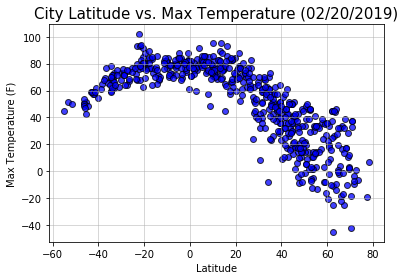

In [7]:
fig, ax = plt.subplots()

ax.scatter(city_df["Lat"], city_df["Max Temp"], color = 'blue', alpha = 0.75, edgecolor = 'black')
ax.grid(linewidth = 0.5)

plt.xlabel("Latitude", Fontsize = 10)
plt.ylabel("Max Temperature (F)", Fontsize = 10)
plt.title("City Latitude vs. Max Temperature (02/20/2019)", Fontsize = 15)

plt.savefig("Images/City Latitude vs. Max Temperature.png")

plt.show()

#### Latitude vs. Humidity Plot

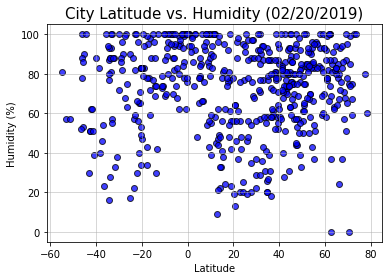

In [8]:
fig, ax = plt.subplots()

ax.scatter(city_df["Lat"], city_df["Humidity"], color = 'blue', alpha = 0.75, edgecolor = 'black')
ax.grid(linewidth = 0.5)

plt.xlabel("Latitude", Fontsize = 10)
plt.ylabel("Humidity (%)", Fontsize = 10)
plt.title("City Latitude vs. Humidity (02/20/2019)", Fontsize = 15)

plt.savefig("Images/City Latitude vs. Humidity.png")

plt.show()

#### Latitude vs. Cloudiness Plot

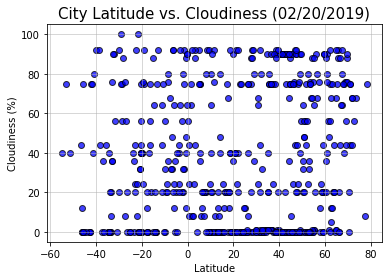

In [9]:
fig, ax = plt.subplots()

ax.scatter(city_df["Lat"], city_df["Cloudiness"], color = 'blue', alpha = 0.75, edgecolor = 'black')
ax.grid(linewidth = 0.5)

plt.xlabel("Latitude", Fontsize = 10)
plt.ylabel("Cloudiness (%)", Fontsize = 10)
plt.title("City Latitude vs. Cloudiness (02/20/2019)", Fontsize = 15)

plt.savefig("Images/City Latitude vs. Cloudiness.png")

plt.show()

#### Latitude vs. Wind Speed Plot

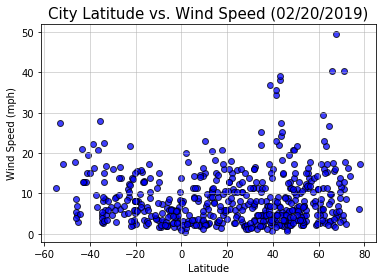

In [10]:
fig, ax = plt.subplots()

ax.scatter(city_df["Lat"], city_df["Wind Speed"], color = 'blue', alpha = 0.75, edgecolor = 'black')
ax.grid(linewidth = 0.5)

plt.xlabel("Latitude", Fontsize = 10)
plt.ylabel("Wind Speed (mph)", Fontsize = 10)
plt.title("City Latitude vs. Wind Speed (02/20/2019)", Fontsize = 15)

plt.savefig("Images/City Latitude vs. Wind Speed.png")

plt.show()

# Observations

1. Latitude correlates with temperature. As we increase in latitude, temperature significantly drops. It seems to be warmer in regions where its closer to the equator.

2. Latitude of the cities has no correlation to cloudiness. No matter which region we are in, it does not affect how cloudy the city is.

3. Wind speed picks up as we increase in latitude but not by too much. Hard to tell if there are correlations here, but if we sampled thousands of cities we may see significant correlations between wind speed and latitude.